<a href="https://colab.research.google.com/github/Dharvi-k/D/blob/main/Workflow(pytorch).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EXERCISES


1. Create a straight line dataset using the linear regression formula (weight * X + bias).

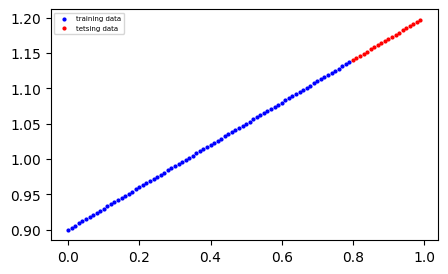

In [48]:
import torch
import matplotlib.pyplot as plt

weight=0.3
bias=0.9
#creating data
start=0
end=1
step=0.01
x=torch.arange(start,end,step)
y=weight * x + bias

#split the data into training and testing
train_split=int(0.8*len(x))
x_train,y_train=x[:train_split],y[:train_split]
x_test,y_test=x[train_split:],y[train_split:]

# Plot the training and testing data
plt.figure(figsize=(5,3))
plt.scatter(x_train,y_train,c="b",s=4,label="training data")
plt.scatter(x_test,y_test,c="r",s=4,label="tetsing data")
plt.legend(fontsize=5)



2. Build a PyTorch model by subclassing nn.Module.

In [53]:
import torch
from torch import nn

# Create PyTorch linear regression model by subclassing nn.Module

class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights=nn.Parameter(torch.randn(1,dtype=torch.float),requires_grad=True)
    self.bias=nn.Parameter(torch.randn(1,dtype=torch.float),requires_grad=True)

  def forward(self,x:torch.Tensor)->torch.Tensor:
    return self.weights *x +self.bias


Model_1=LinearRegressionModel()
Model_1.state_dict()


OrderedDict([('weights', tensor([-0.3101])), ('bias', tensor([2.3876]))])

3. Create a loss function and optimizer using nn.L1Loss() and torch.optim.SGD(params, lr) respectively.

In [60]:
# Create the loss function and optimizer
loss_fxn=nn.L1Loss()
optimizer=torch.optim.SGD(params=Model_1.parameters(),lr=0.01)

# Training loop
epochs=300
for epoch in range(epochs):
  Model_1.train()
  # 1. Forward pass
  y_pred=Model_1(x_train)
  # 2. Calculate loss
  Loss=loss_fxn(y_pred,y_train)
  # 3. Zero gradients
  optimizer.zero_grad()
  # 4. Backpropagation
  Loss.backward()
  # 5. Step the optimizer
  optimizer.step()

### Perform testing every 20 epochs
  if epoch % 20 == 0:
  # Put model in evaluation mode and setup inference context
    Model_1.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_pred=Model_1(x_test)
      # 2. Calculate test loss
      test_loss=loss_fxn(test_pred,y_test)
    # Print out what's happening
      print(f"Epoch: {epoch} | Train loss: {Loss:.3f} | Test loss: {test_loss:.3f}")



Epoch: 0 | Train loss: 0.033 | Test loss: 0.076
Epoch: 20 | Train loss: 0.026 | Test loss: 0.060
Epoch: 40 | Train loss: 0.019 | Test loss: 0.044
Epoch: 60 | Train loss: 0.012 | Test loss: 0.027
Epoch: 80 | Train loss: 0.005 | Test loss: 0.011
Epoch: 100 | Train loss: 0.005 | Test loss: 0.010
Epoch: 120 | Train loss: 0.005 | Test loss: 0.010
Epoch: 140 | Train loss: 0.005 | Test loss: 0.010
Epoch: 160 | Train loss: 0.005 | Test loss: 0.010
Epoch: 180 | Train loss: 0.005 | Test loss: 0.010
Epoch: 200 | Train loss: 0.005 | Test loss: 0.010
Epoch: 220 | Train loss: 0.005 | Test loss: 0.010
Epoch: 240 | Train loss: 0.005 | Test loss: 0.010
Epoch: 260 | Train loss: 0.005 | Test loss: 0.010
Epoch: 280 | Train loss: 0.005 | Test loss: 0.010


CREATING A FUNCTION TO VISULIZE THE DATA

In [55]:
#creating function to visualize data
def plot_prediction(train_data=x_train,
                    test_data=x_test,
                    train_labels=y_train,
                    test_labels=y_test,
                    predictions=None):
  plt.figure(figsize=(5,3))
  plt.scatter(x_train,y_train,c="b",s=4,label="Training data")
  plt.scatter(x_test,y_test,c="g",s=4,label="Testing data")
  if predictions is not None:
    plt.scatter(test_data,predictions,c="r",s=4,label="predictions")
  plt.legend(fontsize=8)

4. Make predictions with the trained model on the test data.

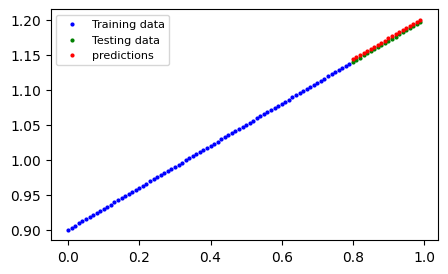

In [61]:
# Make predictions with the model
Model_1.eval()
with torch.inference_mode():
  y_preds=Model_1(x_test)

# Plot the predictions
plot_prediction(predictions=y_preds)


5. Save your trained model's state_dict() to file.

In [63]:
from pathlib import Path
# 1. Create models directory
MODEL_PATH=Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)

# 2. Create model save path
MODEL_NAME="01_pytorch_model.pth"
MODEL_SAVE_PATH=MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"saving model to:{MODEL_SAVE_PATH}")
torch.save(obj=Model_1.state_dict(),f=MODEL_SAVE_PATH)

# Create new instance of model and load saved state dict
Loaded_model_0=LinearRegressionModel()
Loaded_model_0.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Make predictions with loaded model and compare them to the previous
Loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds=Loaded_model_0(x_test)

y_preds==loaded_model_preds

saving model to:models/01_pytorch_model.pth


tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True])